## DA5401 Assignment 5: Visualizing Data Veracity Challenges in Multi-Label Classification
---

### Part A: Preprocessing and Initial Setup
Let's start by importing the necessary libraries

In [11]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap
import matplotlib.pyplot as plt
import numpy as np

Trying to understand the data and save it in a more readable format

In [12]:
arff = arff.loadarff(r"C:\Users\Siddharth Nair\OneDrive\Desktop\DA5401 Assignments\A5\yeast\yeast.arff")
df = pd.DataFrame(arff)
df1 = pd.DataFrame(arff[0])
print(len(df1))
print(df1.head())
print("###")
df2 = pd.DataFrame(arff[1])
print(len(df2))
print(df2.head())
# Convert byte columns to string
for col in df1.columns:
    if df1[col].dtype == object:
        # decode bytes to string
        df1[col] = df1[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df1.to_csv(r"C:\Users\Siddharth Nair\OneDrive\Desktop\DA5401 Assignments\A5\yeast.csv")
print("Saved successfully!")

2417
       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...    b'0'    b'0'    b'1'    b'1'    b'0'   
1 -0.077933 -0.080529 -0.016267  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
2  0.013646 -0.040666 -0.024447  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
3 -0.007670  0.079438  0.062184  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
4  0.064456 -0.133387  0.068878  ...    b'1'    b'1'    b'0'    b'0'    b'0'   

   Class10  Class11  Class12  Class13  Class14  
0     b'0'    

As noticed, there are 2417 datapoints, each with 103 attributes/features and classified using a multi-label combo of 14 classes. Let's store these separately as the feature matrix X and the multi-label target matrix Y

In [13]:
# Read the CSV file
dataset = pd.read_csv(r"C:\Users\Siddharth Nair\OneDrive\Desktop\DA5401 Assignments\A5\yeast.csv")
print(f"Dataset.shape: {dataset.shape}")

# split the features-X and class labels-y
X = dataset.iloc[:, 1:104]
y = dataset.iloc[:, 104:]

print(f"X.shape: {X.shape}")
display(X.head())
print(f"y.shape: {y.shape}")
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (2417, 118)
X.shape: (2417, 103)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


y.shape: (2417, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


To simplify the visualization (since 14 colors can be overwhelming), we are creating 3 new target variables for coloring that represents 
- The two most frequent single-label classes 
- The most frequent multi-label combination
- An "Other" category for the rest 

This approach creates a simple, distinct categorical index for coloring the plots

In [14]:
# Step 1: Identify the top 2 classes that occur most frequently
class_frequencuencies = y.sum().sort_values(ascending=False) # sum of columns of y then order
top_2_frequent_classes = class_frequencuencies.index[:2].tolist()
print(f"Top 2 most frequent classes: {top_2_frequent_classes}")

# Step 2: Identify the most frequent multi-label combination
# Create a string representation of each row's labels
y_comb = y.astype(str).agg('-'.join, axis=1) # sum of rows of columns of y
# Filter for multi-label instances only
multi_label_mask = y.sum(axis=1) > 1
multi_labels = y_comb[multi_label_mask]
# Find the most frequent combination among multi-label instances
most_freq_multi_combination = multi_labels.value_counts().idxmax()
print(f"Most frequent multi-label combination: {most_freq_multi_combination}")


# Step 3: Assign new simplified target variable based on the new logic
def simplify_target_new(row):
    """
    Assigns a new label based on a hierarchical check.
    """
    row_str = '-'.join(row.astype(str))
    
    # Check 1: Is it the most frequent multi-label combination?
    if row.sum() > 1 and row_str == most_freq_multi_combination:
        return 'Second Label (Top Multi-Label Combo)'
        
    # Check 2: Does it contain any of the top 2 individual classes?
    # The .any() method checks if any value is True.
    if row[top_2_frequent_classes].any():
        return 'First Label (Contains Top Class)'
        
    # Check 3: If neither of the above, assign to the 'other' category.
    else:
        return 'Third Label (Others)'

# Apply the function to create the new target variable
y_simple_1 = y.apply(simplify_target_new, axis=1)

# Display the results
print("\nOriginal Labels and New Simplified Labels:")
result_df = y.copy()
result_df['new_label'] = y_simple_1
print(result_df)

Top 2 most frequent classes: ['Class12', 'Class13']
Most frequent multi-label combination: 0-0-1-1-0-0-0-0-0-0-0-1-1-0

Original Labels and New Simplified Labels:
      Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  \
0          0       0       0       0       0       0       1       1       0   
1          0       0       1       1       0       0       0       0       0   
2          0       1       1       0       0       0       0       0       0   
3          0       0       1       1       0       0       0       0       0   
4          0       0       1       1       1       1       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2412       0       1       1       0       0       0       0       0       0   
2413       1       1       0       0       0       0       0       0       0   
2414       0       0       0       0       0       1       1       1       0   
2415       0       0       0       0 

In [16]:
# Distribution of new target variables
print(y_simple_1.value_counts())

First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


The top 2 most frequent classes are Class 12 and 13. The most frequent multi-label class combination is `0-0-1-1-0-0-0-0-0-0-0-1-1-0`. \
The distribution of each variable is listed above

---

## Part B: t-SNE and Veracity Inspection

Before applying t-SNE and Isomap, scaling is crucial.
- Distance-based methods like t-SNE and Isomap rely on calculating distances between data points
- Features with larger scales will dominate the distance calculations
- Standardization ensures all features contribute equally to the distance computation
- Without scaling, features with larger variance could mask important patterns in smaller-scale features


In [18]:
# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(2417, 103)


Let's apply t-SNE to the scaled feature matrix to reduce it to 2 dimensions. Since perplexity is unknown, let's experiment with different values while visualizing using new target labels

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64

Testing perplexity = 5...


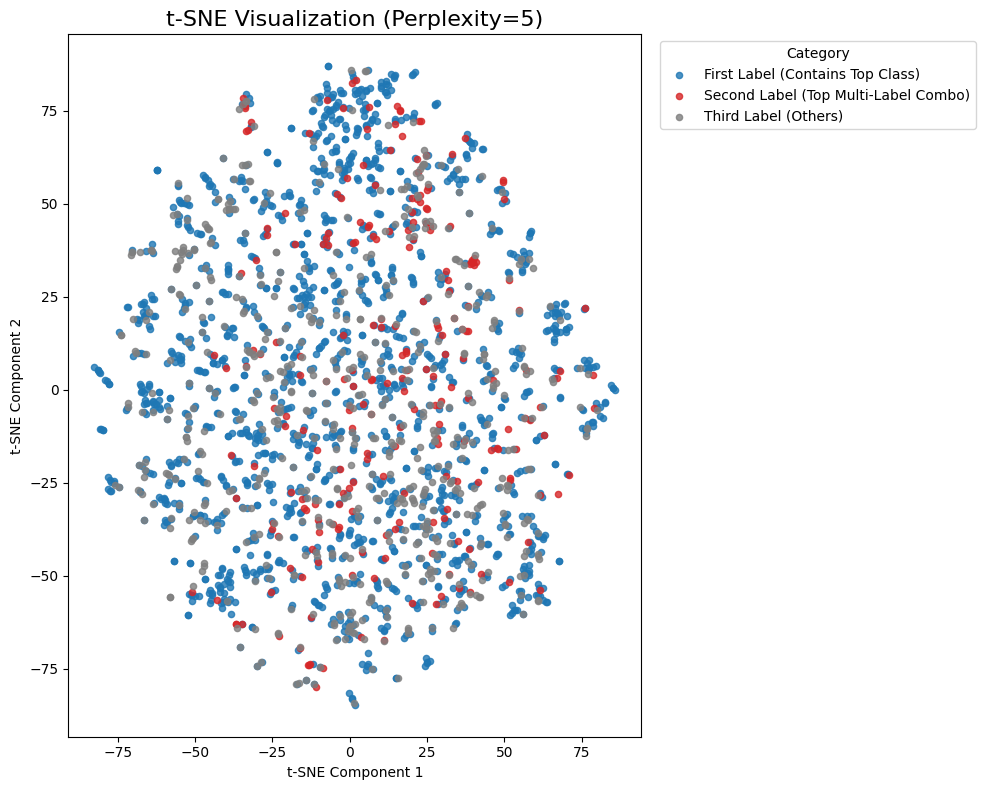

Final KL Divergence: 2.0496

Testing perplexity = 30...


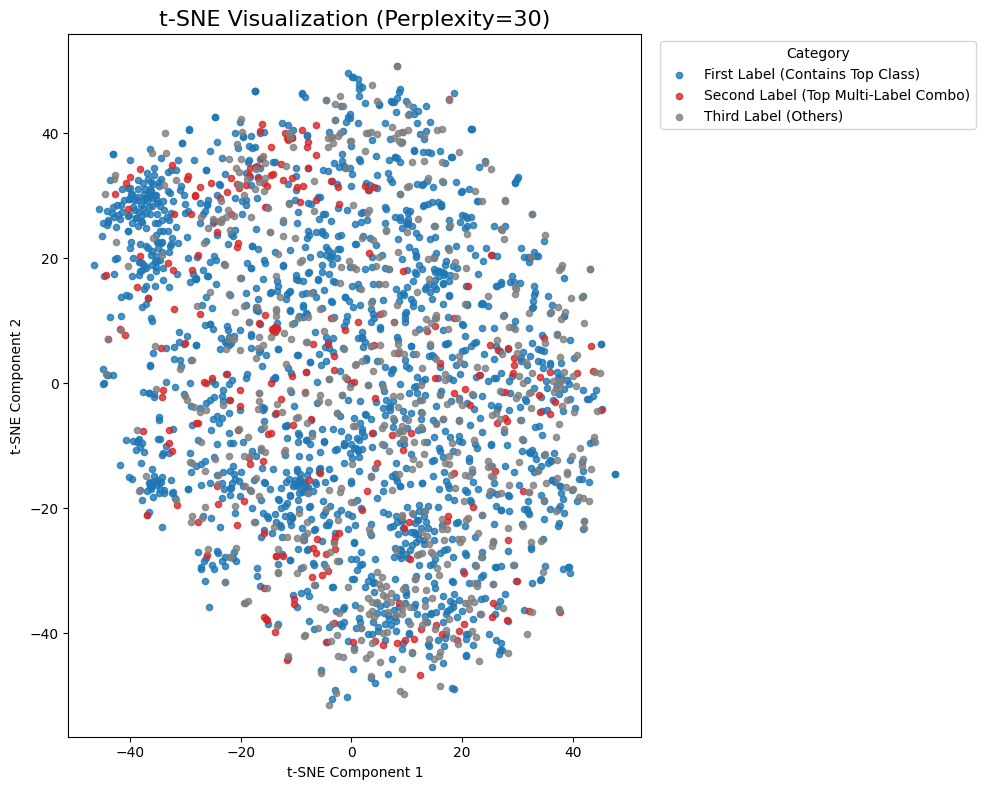

Final KL Divergence: 2.1910

Testing perplexity = 50...


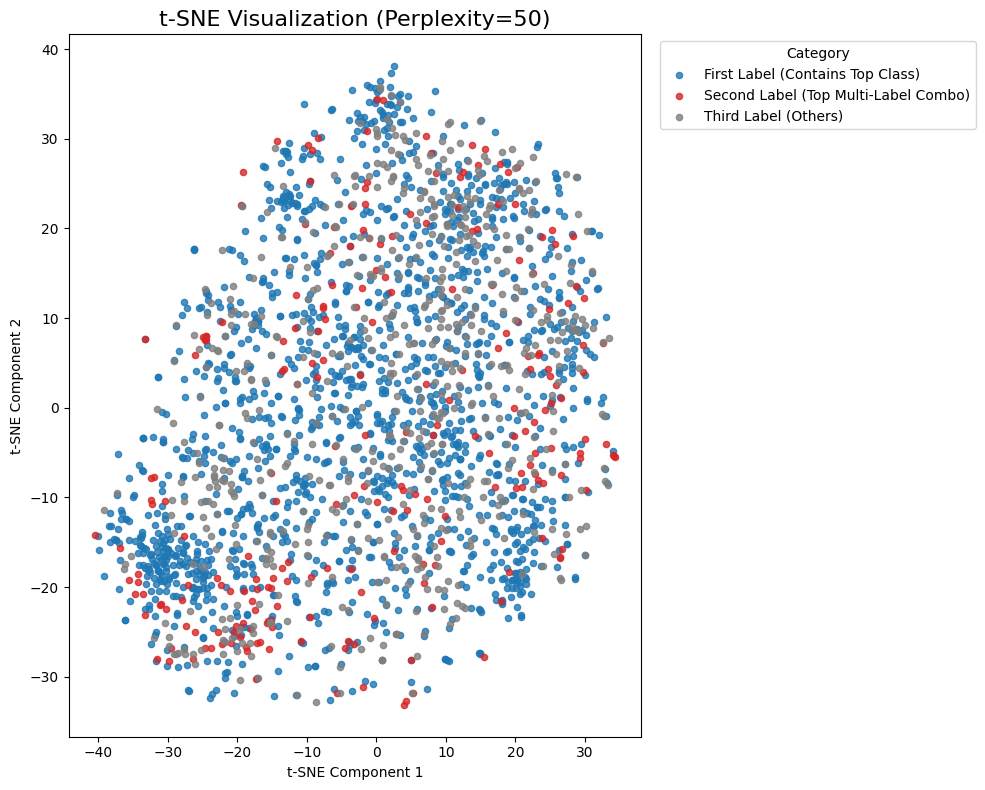

Final KL Divergence: 2.0885


In [20]:
# 1. Define a new color map for the new labels
color_map = {
    'First Label (Contains Top Class)': 'tab:blue',
    'Second Label (Top Multi-Label Combo)': 'tab:red',
    'Third Label (Others)': 'tab:gray'
}

# Print the distribution of the new labels
print("Sample distribution in new labels:")
print(y_simple_1.value_counts())

# 2. Test different perplexity values for t-SNE
perplexities = [5, 30, 50]
tsne_results = {}

for perplexity in perplexities:
    print(f"\nTesting perplexity = {perplexity}...")
    
    # Initialize TSNE with the current perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, init='random')
    
    # Fit and transform the data (this is the correct order)
    X_tsne = tsne.fit_transform(X_scaled)
    
    # Store results
    tsne_results[perplexity] = {
        'coordinates': X_tsne,
        'kl_divergence': tsne.kl_divergence_
    }
    
    # 3. Plotting logic remains similar, but uses the new color_map
    plt.figure(figsize=(10, 8))
    for cat_label, cat_color in color_map.items():
        # Create a boolean mask for the current category
        idx = (y_simple_1 == cat_label).to_numpy()
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1],
            color=cat_color, label=cat_label, s=20, alpha=0.8)

    plt.title(f"t-SNE Visualization (Perplexity={perplexity})", fontsize=16)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    # Adjust legend positioning for better visibility
    plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout() # Adjusts plot to prevent labels from being clipped
    plt.show()
    
    print(f"Final KL Divergence: {tsne.kl_divergence_:.4f}")

It's observed that `perplexity` = 30 yields the best clusters, despite the KL Divergence not being the lowest. Hence, relying on this visual confirmation, let's go ahead with using `perplexity` as 30. Some other points to note:
- Small perplexity focuses on local structure, hence may miss global patterns
- Higher perplexity considers more neighbors, allowing smoother embedding

A perplexity of 30 considers an appropriate number of neighbors (~30) for meaningful clustering


### Veracity inspection
Key Observations:
- Overall Dispersion: The points are widely spread across the 2D space, suggesting that the original high-dimensional data has significant intrinsic variability.

- Presence of Clusters/Groups: There appear to be some loose groupings, but no perfectly distinct, well-separated clusters for any single category. The categories are quite intermingled.

- Intermingling of Categories:

    - "First Label (Contains Top Class)" (Blue): These points are spread throughout the plot, seemingly forming the bulk of the data. They are present in almost all areas where other points are found.

    - "Second Label (Top Multi-Label Combo)" (Red): These points are also dispersed but seem to form slightly denser pockets in various regions, often mixed with blue and grey points. There isn't a clear "red-only" cluster.

    - "Third Label (Others)" (Grey): Similar to the blue points, the grey points are quite diffuse and intermingled with the other two categories.

![Identifying patterns within the data](./Veracity_edit.png)
1. **Noisy/Ambiguous Labels**: \
Represented by the bounded circles in the image. The (mainly blue) clusters contain deeply embedded red points
2. **Outliers**: \
Usually shown as isolated points, or tiny, distant clusters (some highlighted with the pink shade). I haven't highlighted all outliers since they depend on the definitions defined using domain knowledge. Also, in our case, the data is well-dispersed with lack of clear clusters. Outliers in such a case may present 3 possibilities:
    - They are biological novelties. They may be a result of genetic mutations, strong environment stress response, or a rare cellular state. This is when domain knowledge plays an important role.
    - They maybe technical artifacts/ data errors. They may have occured due to errors in the experimental pipeline such as sample contamination, low-quality sample, etc.
    - The outliers may be legitimate data points in an under-sampled region of a high-dimensional space, i.e, the dataset is maybe sparse and just not large enough to cover every variation of gene-expression space. Some isolated points might represent a perfectly valid yeast state for which you only happened to collect one sample
3. **Hard-to-learn samples**: \
They are represented by the yellow shaded regions. They are characterized by intermingling of all 3 categories. A simple classifier would likely struggle in regions where functional category colors are thoroughly mixed because those areas represent a high degree of class overlap in the feature space. The mixing of colors indicates that experiments with very similar gene expression profiles are being assigned to different functional categories. They would fail to find a clear decision boundary to separate the different classes.

Essentially, the target variable provides the hypothesis that we are testing with our visualization. The veracity inspection is the process of visually confirming or refuting that hypothesis, thereby understanding the challenges a classifier will face before we even start training. Hence, the target variables defined play an important role during veracity inspection. 

---

## Part C: Isomap and Manifold Learning

Let's apply isomap to the scaled feature matrix and compare it with tSNE.

Isomap works in two main stages:

1. It constructs a neighborhood graph where each data point is connected only to its k nearest neighbors.

2. It then calculates the shortest path distance between all pairs of points within this graph, approximating the true "geodesic" distance along the manifold's curved surface.

Changing the `n_neighbors` parameter directly alters the connectivity of this initial graph, with significant consequences for the final structure. 


Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


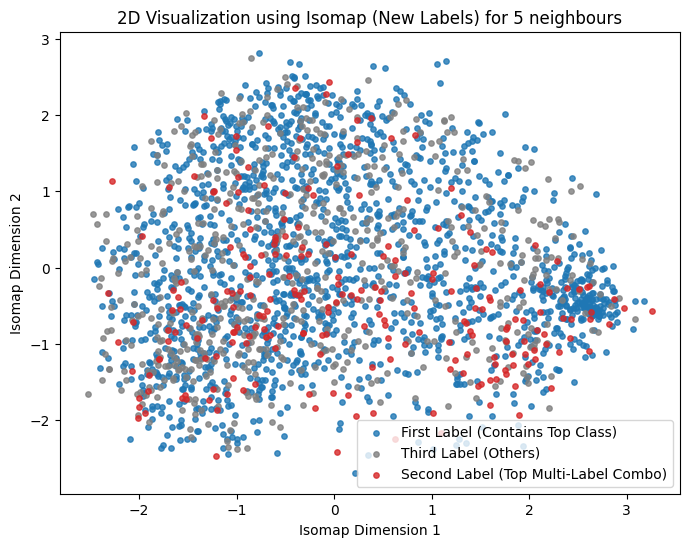

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


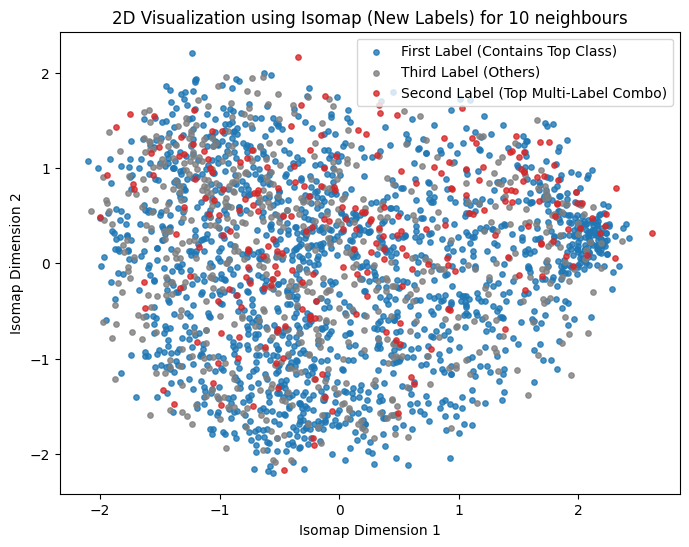

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


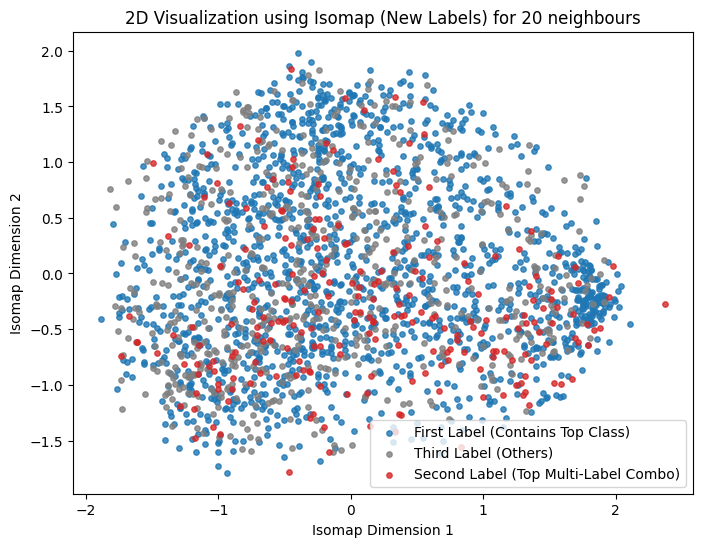

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


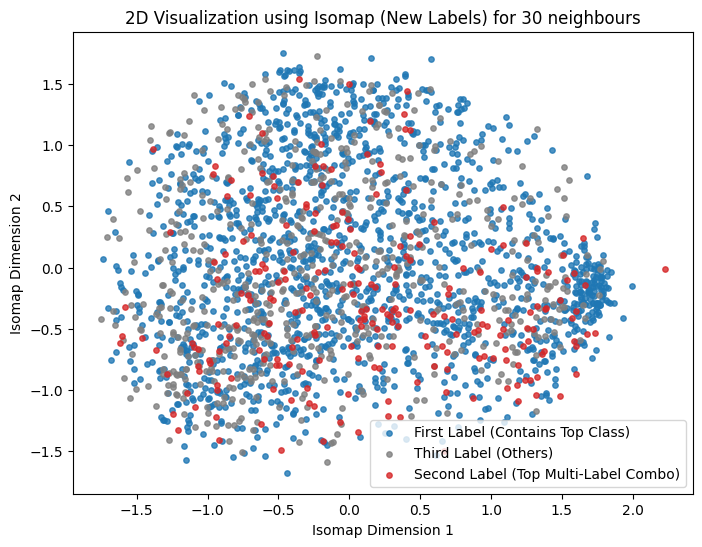

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


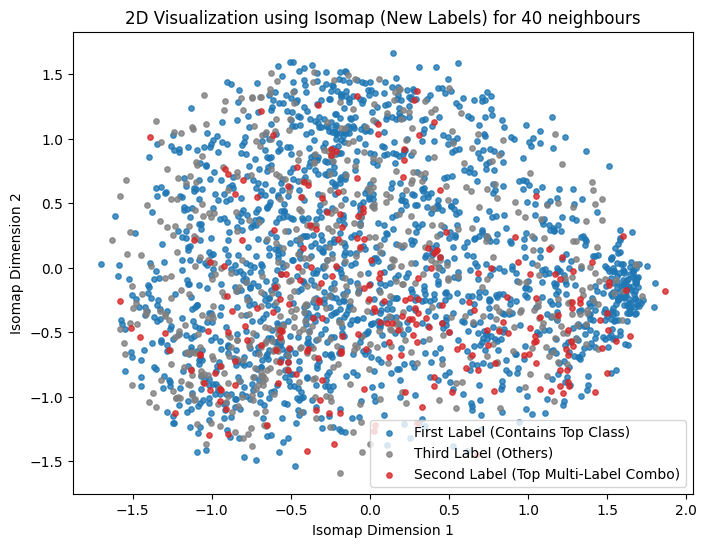

Sample distribution in new labels:
First Label (Contains Top Class)        1579
Third Label (Others)                     601
Second Label (Top Multi-Label Combo)     237
Name: count, dtype: int64


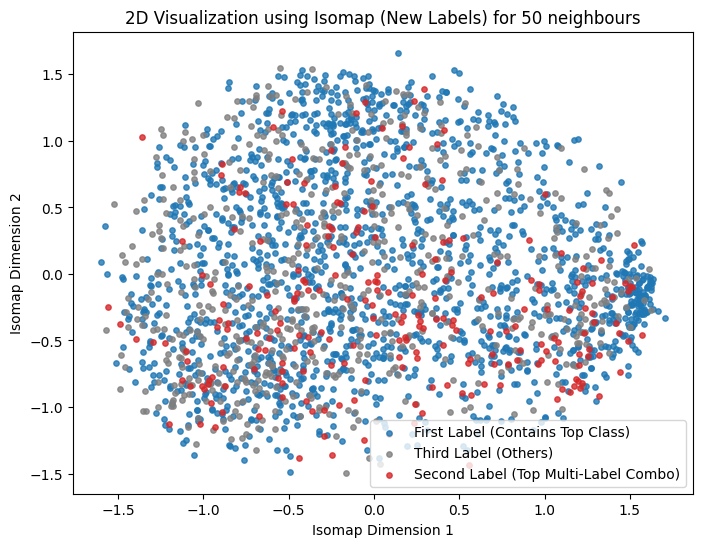

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Apply Isomap to scaled X (reduce to 2D)
n_neighbours = [5, 10, 20, 30, 40, 50]
for n in n_neighbours:
    isomap = Isomap(n_components=2, n_neighbors=n)  # you can tune n_neighbors
    X_isomap = isomap.fit_transform(X)

    # Print the distribution of the new labels
    print("Sample distribution in new labels:")
    print(y_simple_1.value_counts())

    # Scatter plot with custom colors
    plt.figure(figsize=(8,6))
    for label in y_simple_1.unique():
        plt.scatter(
            X_isomap[y_simple_1 == label, 0],
            X_isomap[y_simple_1 == label, 1],
            label=label,
            c=color_map[label],
            s=15, alpha=0.8
        )

    plt.xlabel("Isomap Dimension 1")
    plt.ylabel("Isomap Dimension 2")
    plt.title(f"2D Visualization using Isomap (New Labels) for {n} neighbours")
    plt.legend()
    plt.show()

We experimented with several `n_neighbors` values (e.g., 5, 10, 20, 30, 40 and 50) to find an optimal representation of the data's global manifold structure. This hyperparameter is crucial: a value that is too low can result in a disconnected graph that fails to capture the overall structure, while a value that is too high can create "shortcuts" that incorrectly linearize the manifold.

In our analysis, we observed that values of 20, 30, 40 and 50 all produced highly similar visualizations. This stability indicates that the underlying global structure of the yeast gene expression data is robust and not merely an artifact of the hyperparameter setting. It suggests that these values are within a "stable plateau",i.e, sufficient to connect the manifold properly without introducing distorting shortcuts. Hence let's select `n_neighbors`=30 for our final plot as a representative value from this stable range.

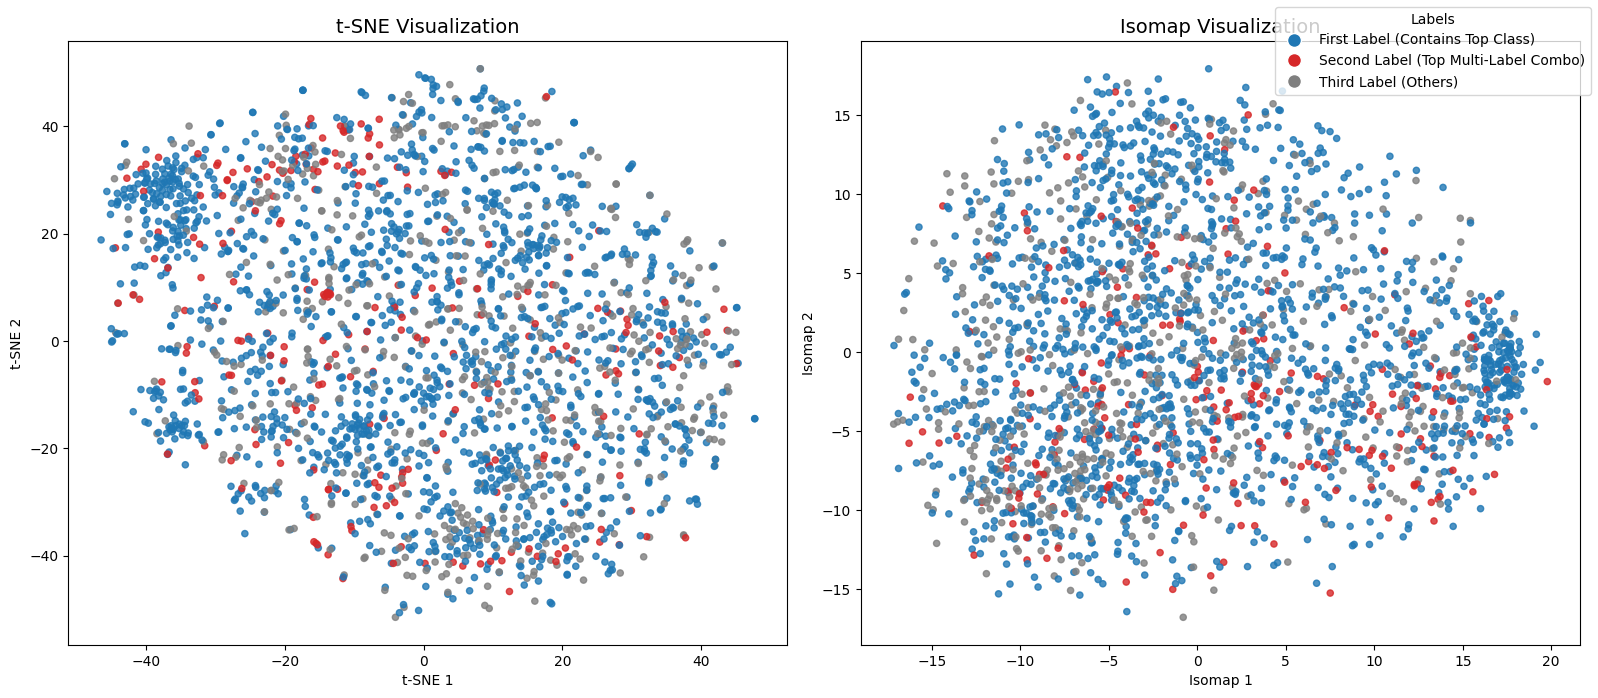

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap

# --- t-SNE embedding ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='random')
X_tsne = tsne.fit_transform(X_scaled)

# --- Isomap embedding ---
isomap = Isomap(n_components=2, n_neighbors=30)  # neighbors can be tuned
X_iso = isomap.fit_transform(X_scaled)

# --- Color mapping ---
color_map = {
    'First Label (Contains Top Class)': 'tab:blue',
    'Second Label (Top Multi-Label Combo)': 'tab:red',
    'Third Label (Others)': 'tab:gray'
}
point_colors = y_simple_1.map(color_map).to_numpy()

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# t-SNE plot
axes[0].scatter(X_tsne[:,0], X_tsne[:,1], c=point_colors, s=20, alpha=0.8)
axes[0].set_title('t-SNE Visualization', fontsize=14)
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')

# Isomap plot
axes[1].scatter(X_iso[:,0], X_iso[:,1], c=point_colors, s=20, alpha=0.8)
axes[1].set_title('Isomap Visualization', fontsize=14)
axes[1].set_xlabel('Isomap 1')
axes[1].set_ylabel('Isomap 2')

# Legend (shared)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label],
                      markersize=10, label=label) for label in color_map.keys()]
fig.legend(handles=handles, loc='upper right', title='Labels')

plt.tight_layout()
plt.show()


What I noticed comparing tSNE vs Isomap:

Isomap is netter at revealing the global structure of the gene expression data:
- The t-SNE visualization excels at revealing local neighborhoods. It creates distinct, relatively dense clusters, showing which data points are immediate neighbors in the high-dimensional space. However, the size of and distance between these clusters are not reliable indicators of the data's overall layout. t-SNE's goal is to preserve local similarity, often at the expense of global geometry 
- Isomap, by contrast, is designed to preserve the geodesic distances between all points, effectively trying to "unroll" the underlying data manifold. The Isomap plot shows the data as a more continuous, connected structure rather than a collection of separate clumps. This reveals the larger, overarching shape of the dataset and how different regions relate to one another on a grander scale


Let's see if there isomap preserves any manifols in 3 dimensional space

In [30]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.manifold import Isomap

# --- Isomap embedding with 3 components ---
isomap = Isomap(n_components=3, n_neighbors=30)
X_iso = isomap.fit_transform(X_scaled)

# --- Create a DataFrame for Plotly ---
df_iso = pd.DataFrame(X_iso, columns=['Isomap Component 1', 'Isomap Component 2', 'Isomap Component 3'])
df_iso['Category'] = y_simple_1

# --- Color mapping ---
color_map = {
    'First Label (Contains Top Class)': 'blue',
    'Second Label (Top Multi-Label Combo)': 'red',
    'Third Label (Others)': 'gray'
}

# --- Create a Figure with plotly.graph_objects ---
fig = go.Figure()

# --- Add a separate trace for each category ---
# This creates legend items you can click to show/hide categories.
for category_name, color in color_map.items():
    # Filter the DataFrame for the current category
    df_subset = df_iso[df_iso['Category'] == category_name]
    
    fig.add_trace(
        go.Scatter3d(
            x=df_subset['Isomap Component 1'],
            y=df_subset['Isomap Component 2'],
            z=df_subset['Isomap Component 3'],
            mode='markers',
            marker=dict(
                size=1,
                color=color, # Use the specified color
                opacity=0.8
            ),
            name=category_name # This name will appear in the legend
        )
    )

# --- Customize the layout ---
fig.update_layout(
    title='Interactive 3D Isomap Visualization',
    legend_title_text='Category',
    # Adjusting the scene for better viewing
    scene=dict(
        xaxis_title='Isomap Component 1',
        yaxis_title='Isomap Component 2',
        zaxis_title='Isomap Component 3'
    )
)

fig.show()

The results are really interesting. Looking only at the first Label, we notice that the distinct cluster noticed in the 2D Isomap plots assume an obvious non-linear relationship in the high-dimensional space, indicating a manifold. Also, most of the blue points lie in the 3d space occupying the volume like a sphere. The second and third label as such do not show any similar relationship.

### The Data Manifold
The data manifold is the idea that even though the gene expression data exists in a high-dimensional space (103 features), the data points themselves don't fill this space randomly. Instead, they lie on or near a lower-dimensional surface that is embedded, and likely curved, within that higher-dimensional space. Think of a long, coiling rope (a 1D manifold) existing within a large 3D room. Isomap's job is to discover and flatten out this underlying shape.

The complexity of this manifold is directly related to the difficulty of classification:

1. **Simple Manifolds**: If the data for different classes lay on separate, flat manifolds, a simple linear classifier could easily draw a line or plane between them to achieve high accuracy.

2. **Complex Manifolds**: The Isomap plot shows that the different categories (colors) are thoroughly mixed along this single, curved manifold. This means that as you travel along the natural structure of the data, the functional category frequently changes. A simple classifier cannot learn a straight decision boundary to separate classes that are intertwined on a curved surface. Therefore, a complex manifold necessitates a complex, non-linear classifier that can learn a decision boundary that respects the manifold's intricate shape.

In our case, the Isomap plot suggests the data lies on a moderately complex and curved manifold. The visualization is not a simple, round cloud but has a distinct, elongated, and slightly folded shape. This indicates that the relationships between the gene expression profiles are non-linear